In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

##def to_one_hot(labels, dimension=46):
    #results = np.zeros((len(labels), dimension))
   # for i, label in enumerate(labels):
  #      results[i, label] = 1.
 #   return results
#
#one_hot_train_labels = to_one_hot(train_labels)
#one_hot_test_labels = to_one_hot(test_labels)
##
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
                       

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

              

2023-12-07 11:56:46.267033: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 127ms/step - loss: 2.8115 - accuracy: 0.4847 - val_loss: 1.8887 - val_accuracy: 0.5930
Epoch 2/20
16/16 [==============================] - 2s 102ms/step - loss: 1.5676 - accuracy: 0.6718 - val_loss: 1.3864 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 2s 102ms/step - loss: 1.1826 - accuracy: 0.7484 - val_loss: 1.1969 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 2s 101ms/step - loss: 0.9659 - accuracy: 0.7923 - val_loss: 1.0974 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 2s 133ms/step - loss: 0.7979 - accuracy: 0.8285 - val_loss: 1.0119 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 2s 96ms/step - loss: 0.6684 - accuracy: 0.8564 - val_loss: 0.9601 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 2s 106ms/step - loss: 0.5575 - accuracy: 0.8812 - val_loss: 0.9456 - val_accuracy: 0.8030
Epoch 8

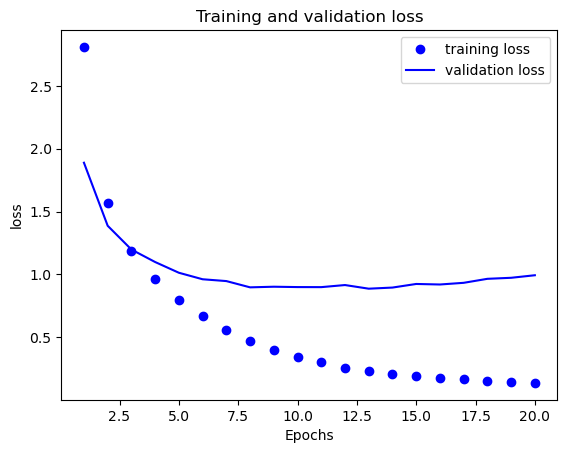

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()


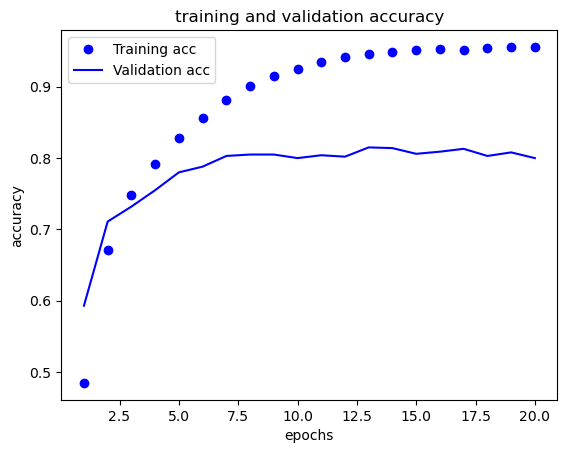

In [14]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)



Epoch 1/9
16/16 [==============================] - 3s 123ms/step - loss: 2.6469 - accuracy: 0.4405 - val_loss: 1.7966 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 2s 103ms/step - loss: 1.5189 - accuracy: 0.6820 - val_loss: 1.3935 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 2s 120ms/step - loss: 1.1832 - accuracy: 0.7402 - val_loss: 1.2099 - val_accuracy: 0.7350
Epoch 4/9
16/16 [==============================] - 2s 127ms/step - loss: 0.9762 - accuracy: 0.7881 - val_loss: 1.0980 - val_accuracy: 0.7550
Epoch 5/9
16/16 [==============================] - 2s 105ms/step - loss: 0.8168 - accuracy: 0.8235 - val_loss: 1.0201 - val_accuracy: 0.7700
Epoch 6/9
16/16 [==============================] - 2s 120ms/step - loss: 0.6831 - accuracy: 0.8527 - val_loss: 0.9676 - val_accuracy: 0.7870
Epoch 7/9
16/16 [==============================] - 2s 119ms/step - loss: 0.5744 - accuracy: 0.8781 - val_loss: 0.9421 - val_accuracy: 0.7920
Epoch 8/9
16/

In [ ]:
predictions = model.predict(x_test)